In [1]:
import drishtypy.utils.get_cuda as cuda
device = cuda.get_device()

cuda available
Device set to :  cuda:0


In [2]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1
batch_size=128

In [3]:
import os 
path = os.getcwd()
path  = path + '/dataset/'
print(path)

/home/abhinav/Drishtypy/dataset/


In [4]:
import drishtypy.data.returns_dataloader as dl
trainset, testset, train_loader, test_loader = dl.get_dataloader(batch_size=batch_size, num_workers=4, cuda = True,path = path)

['/home/abhinav/Drishtypy', '/home/abhinav/anaconda3/lib/python38.zip', '/home/abhinav/anaconda3/lib/python3.8', '/home/abhinav/anaconda3/lib/python3.8/lib-dynload', '', '/home/abhinav/.local/lib/python3.8/site-packages', '/home/abhinav/anaconda3/lib/python3.8/site-packages', '/home/abhinav/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/abhinav/.ipython', '/home/abhinav/Drishtypy']
Running over Cuda !!  True
Files already downloaded and verified
Files already downloaded and verified
mean 0.49186864
standard dev 0.24697131
mean 0.48265335
standard dev 0.24338901
mean 0.44717798
standard dev 0.26159254
Files already downloaded and verified
Files already downloaded and verified


In [5]:
# import drishtypy.viz.do_plots as plt
# plt.plot_dataset_images(device, classes, train_loader)

In [6]:
import drishtypy.models.resnet as mod
model = mod.ResNet18()

In [7]:
# from drishtypy.learner.learner import model_summary
# model_summary(model, device, input_size=(3, 32, 32))

In [8]:
from tqdm import tqdm
from drishtypy.learner.learner import build_model

In [9]:
# import torch.optim as optim
# import torch.nn as nn
# from torch_lr_finder import LRFinder
# optimizer = optim.SGD(model.parameters(), lr=0.0000000001, momentum=0.95, nesterov=True)
# criterion = nn.CrossEntropyLoss()
# lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
# lr_finder.range_test(train_loader, end_lr=10, num_iter=100, step_mode="exp")
# lr_finder.plot()
# loss = lr_finder.history['loss']
# lr = lr_finder.history['lr']
    
# lr = lr[loss.index(min(loss))]
# print('Using Learning Rate : ', lr)
# lr_finder.reset()

In [10]:
# for index in range(len(lr_finder.history['loss'])):
#   item = lr_finder.history['loss'][index]
#   if item == lr_finder.best_loss:
#     min_val_index = index
# #     print(f"{min_val_index}")

# # lr_finder.plot(show_lr=lr_finder.history['lr'][75])
# # lr_finder.plot(show_lr=lr_finder.history['lr'][min_val_index])

# import math
# val_index = 75
# mid_val_index = math.floor((val_index + min_val_index)/2)
# # show_lr=[{'data': lr_finder.history['lr'][val_index], 'linestyle': 'dashed'}, {'data': lr_finder.history['lr'][mid_val_index], 'linestyle': 'solid'}, {'data': lr_finder.history['lr'][min_val_index], 'linestyle': 'dashed'}]
# # print(show_lr)

# best_lr = lr_finder.history['lr'][mid_val_index]
# print(f"LR to be used: {best_lr}")


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.78E+00


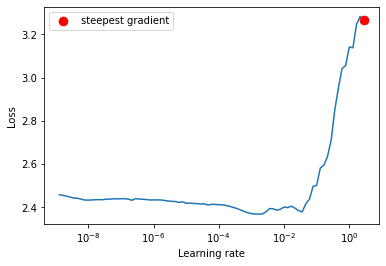

  0%|          | 0/391 [00:00<?, ?it/s]

LR to be used: 0.0059948425031894105
EPOCH: 0


Loss=1.499036 Batch_id=390 Accuracy=45.41: 100%|██████████| 391/391 [00:48<00:00,  8.01it/s]

LR: 0.0059948425031894105



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.207728, Accuracy: 5720/10000 (57.20%)

EPOCH: 1


Loss=1.126957 Batch_id=390 Accuracy=59.82: 100%|██████████| 391/391 [00:49<00:00,  7.93it/s]

LR: 0.0059948425031894105



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.919205, Accuracy: 6768/10000 (67.68%)

EPOCH: 2


Loss=0.953889 Batch_id=390 Accuracy=66.24: 100%|██████████| 391/391 [00:49<00:00,  7.84it/s]

LR: 0.0059948425031894105



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.763678, Accuracy: 7367/10000 (73.67%)

EPOCH: 3


Loss=0.843730 Batch_id=390 Accuracy=70.34: 100%|██████████| 391/391 [00:49<00:00,  7.98it/s]

LR: 0.0059948425031894105



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.789148, Accuracy: 7381/10000 (73.81%)

EPOCH: 4


Loss=0.766003 Batch_id=390 Accuracy=73.09: 100%|██████████| 391/391 [00:52<00:00,  7.49it/s]

LR: 0.0059948425031894105



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.704303, Accuracy: 7607/10000 (76.07%)

EPOCH: 5


Loss=0.716554 Batch_id=213 Accuracy=74.80:  55%|█████▍    | 214/391 [00:27<00:23,  7.68it/s]


KeyboardInterrupt: 

In [11]:
# build and train the model
model_name = "Model CIFAR10"
EPOCHS = 10
model =  model.to(device) # use GPU

# using L1 and L2 regularization
train_acc, train_losses, test_acc, test_losses = build_model(model, 
                                                            device, 
                                                            trainloader=train_loader, 
                                                            testloader=test_loader, 
                                                            epochs=EPOCHS,
                                                            L1_loss_flag=False,
                                                            L2_penalty_val=0.001)

In [12]:
from drishtypy.learner.learner import get_test_accuracy,class_based_accuracy
get_test_accuracy(model, device, test_loader)
class_based_accuracy(model, device, classes, test_loader)


Accuracy of the network on the 10000 test images: 74.78%

Accuracy of plane : 61 %
Accuracy of   car : 86 %
Accuracy of  bird : 79 %
Accuracy of   cat : 56 %
Accuracy of  deer : 84 %
Accuracy of   dog : 74 %
Accuracy of  frog : 88 %
Accuracy of horse : 74 %
Accuracy of  ship : 86 %
Accuracy of truck : 81 %


In [13]:
from drishtypy.viz.do_plots import  plot_model_history
print("\nPloting Accuracy and Loss history: {}\n".format(model_name))
plot_model_history(model_name, 
                   train_acc,test_acc,
                   train_losses,test_losses,
                   save_filename = "model_history")


Ploting Accuracy and Loss history: Model CIFAR10



NameError: name 'train_acc' is not defined

In [14]:
# import gradcam.gradcam_abs as gradcamAbs1
import drishtypy.viz.gradcam.gradcam_abs as gradcamAbs1
from drishtypy.data.data_utils import find_stats
means,stds = find_stats(path)

/home/abhinav/Drishtypy
Files already downloaded and verified
Files already downloaded and verified
mean 0.49186864
standard dev 0.24697131
mean 0.48265335
standard dev 0.24338901
mean 0.44717798
standard dev 0.26159254


In [ ]:
path = os.getcwd() + '/Out'


/home/abhinav/Drishtypy/drishtypy/viz/gradcam/gradcam_abs.py:70: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629395347/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  wrong_idx = (pred_marker == False).nonzero()  # get indices for wrong predictions
/home/abhinav/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


PermissionError: [Errno 13] Permission denied: '../../Outputgradcam_result_details.png'

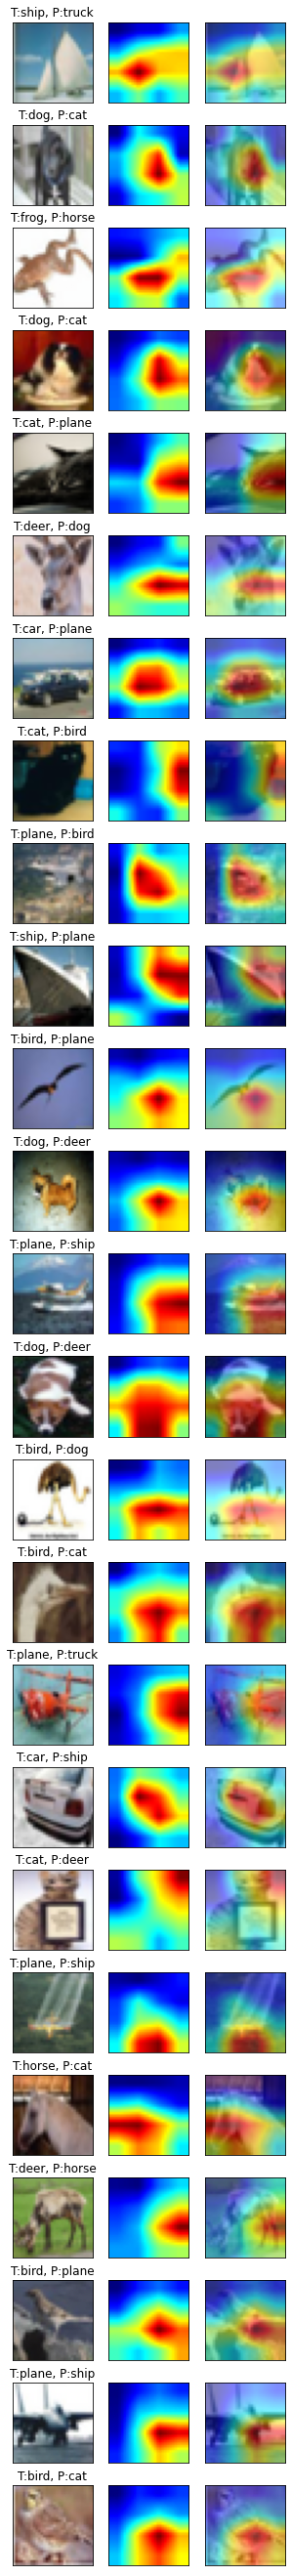

In [15]:
config = dict(model_type='resnet', arch=model, layer_name='layer4')
gcam = gradcamAbs1.GradCamAbs(device, config, means, stds)

gradcam_images, pred_results = gcam.applyOnMisclassifiedImages(dataloader=test_loader, num_of_images=25)

gcam.plot_results(gradcam_images, pred_results, classes, save_filename="gradcam_result_details")